In [1]:
import pandas as pd


data = pd.read_csv('medical_data.csv')
print(data.head(10))

import pandas as pd

def clean_missing_values(data, output_csv):
    """
    Clean missing values in the DataFrame by removing rows containing missing values.

    Parameters:
    - data (DataFrame): Input DataFrame containing missing values.
    - output_csv (str): Path to save the cleaned DataFrame as a CSV file.

    Returns:
    - cleaned_data (DataFrame): DataFrame with rows containing missing values removed.
    """
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a pandas DataFrame.")

    # Count missing values per row
    missing_counts_before = data.isnull().sum(axis=1)

    # Print missing value counts before cleaning
    print("Missing Value Counts Before Cleaning:")
    print(missing_counts_before)

    # Remove rows with missing values
    cleaned_data = data.dropna()

    # Count missing values per row after cleaning
    missing_counts_after = cleaned_data.isnull().sum(axis=1)

    # Print missing value counts after cleaning
    print("Missing Value Counts After Cleaning:")
    print(missing_counts_after)

    # Save cleaned DataFrame to CSV file
    cleaned_data.to_csv(output_csv, index=False)
    print(f"Cleaned data saved to {output_csv}")

    return cleaned_data

# Example usage (assuming your data is in a CSV file)
cleaned_data = clean_missing_values(pd.read_csv('medical_data.csv'), 'cleaned_data.csv')


    seqn  lbxsal  lbdsalsi  lbxsatsi  lbxsassi  lbxsapsi  lbxsbu  lbdsbusi  \
0  62161     4.8      48.0      19.0      25.0        89    14.0      5.00   
1  62163     4.0      40.0      13.0      19.0       167    16.0      5.71   
2  62164     3.7      37.0      29.0      37.0        23     5.0      1.79   
3  62165     4.1      41.0      13.0      19.0        94    12.0      4.28   
4  62169     4.4      44.0      19.0      17.0        51    16.0      5.71   
5  62170     4.5      45.0      20.0      28.0       256    12.0      4.28   
6  62171     4.6      46.0      25.0      23.0       263    10.0      3.57   
7  62172     4.4      44.0      17.0      15.0        55     8.0      2.86   
8  62174     3.1      31.0      30.0      42.0       120     9.0      3.21   
9  62176     4.5      45.0      17.0      22.0        52    11.0      3.93   

   lbxsca  lbdscasi  ...  lbxsua  lbdsuasi  lbxsnasi  lbxsksi  lbxsclsi  \
0     9.6     2.400  ...     4.9     291.5     137.0      3.9     

In [2]:


columns_to_drop = ['lbdsalsi', 'lbdsbusi', 'lbdscasi', 'lbdschsi', 'lbdscrsi','lbdsirsi', 
                   'lbdsphsi', 'lbdstbsi', 'lbdstpsi','lbdsuasi', 'lbdsgbsi', 'lbdstrsi','lbdsglsi']

# حذف الأعمدة غير المرغوب فيها
data_cleaned = data.drop(columns=columns_to_drop)

# حفظ البيانات النظيفة في ملف CSV جديد
data_cleaned.to_csv('cleaned_data.csv', index=False)



In [3]:
import pandas as pd

def identify_transactions(data, thresholds_low, thresholds_high):
    transactions = []
    # Append the header row with Transaction ID and column names
    transactions.append(list(data.columns))
    
    # Iterate over the rows (excluding the first row, which contains column names)
    for idx, row in enumerate(data.iterrows(), start=1):
        transaction = [idx]  # Append Transaction ID
        for col, value in row[1].items():
            if col in thresholds_low and col in thresholds_high:
                if pd.notna(value):
                    if value > thresholds_high[col]:
                        transaction.append(1)  # Value higher than high threshold
                    elif value < thresholds_low[col]:
                        transaction.append(-1)  # Value lower than low threshold
                    else:
                        transaction.append(0)  # Value between low and high thresholds
                else:
                    transaction.append(0)  # Null value, treated as between thresholds
        transactions.append(transaction)
    
    return transactions

# Load data from CSV file
data_file = 'cleaned_data.csv'
data = pd.read_csv(data_file)

# Define thresholds based on your data
thresholds_high = {
    "lbxsal": 5.5,  # Example thresholds for some tests (adjust based on your data)
    "lbxsatsi": 33,
    "lbxsassi": 33,
    "lbxsapsi": 130,
    "lbxsbu": 20,
    "lbdsbusi": 5,
    "lbxsca": 10.2,
    "lbxsck": 200,
    "lbxsch": 240,
    "lbxsc3si": 50,
    "lbxscr": 1.3,
    "lbxsgtsi": 40,
    "lbxsgl": 100,
    "lbxsir": 150,
    "lbxsldsi": 233,
    "lbxsph": 4.5,
    
    "lbxstb": 1.2,
    
    "lbxstp": 8.3,
    
    "lbxsua": 7,
    "lbdsuasi": 291.5,
    "lbxsnasi": 145,
    "lbxsksi": 5.2,
    "lbxsclsi": 106,
    "lbxsossi": 235,
   "lbxsgb": 3.5,
   
    "lbxstr": 199
   
}

# Define thresholds based on your data
thresholds_low = {
    "lbxsal": 2.2,  # Example thresholds for some tests (adjust based on your data)
    "lbxsatsi": 19,
    "lbxsassi": 25,
    "lbxsapsi": 20,
    "lbxsbu": 7,
    "lbxsca": 8.5,
    "lbxsck": 20,
    "lbxsch": 190,
  
    "lbxsc3si": 5,
    "lbxscr": 0.7,
    
    "lbxsgtsi": 5,
    "lbxsgl": 72,
    
    "lbxsir": 40,
   
    "lbxsldsi": 105,
    "lbxsph": 2.8,
    
    "lbxstb": 0.1,
   
    "lbxstp": 6,
    
    "lbxsua": 2,
   
    "lbxsnasi": 135,
    "lbxsksi": 3.6,
    "lbxsclsi": 96,
    "lbxsossi": 275,
   "lbxsgb": 2,
    
    "lbxstr": 150,
   
}

# Identify transactions
transactions = identify_transactions(data, thresholds_low, thresholds_high)

# Convert transactions to a DataFrame
transactions_df = pd.DataFrame(transactions)

# Define the path for the output CSV file
output_file = 'transactions.csv'

# Save transactions to a CSV file
transactions_df.to_csv(output_file, index=False, header=False)


In [8]:
import pandas as pd

def build_high_low_transactions(data_file, output_high_file, output_low_file):
    # Load data from CSV file
    data = pd.read_csv(data_file)

    # Initialize high and low transactions lists
    high_transactions = []
    low_transactions = []

    # Iterate through rows of the data
    for idx, row in data.iterrows():
        high_transaction = [ row['seqn']] + [1 if val == 1 else 0 for val in row[1:]]
        low_transaction = [row['seqn']] + [1 if val == -1 else 0 for val in row[1:]]
        
        # Append high and low transactions
        high_transactions.append(high_transaction)
        low_transactions.append(low_transaction)

    # Create DataFrames
    high_transactions_df = pd.DataFrame(high_transactions, columns=['seqn'] + list(data.columns[1:]))
    low_transactions_df = pd.DataFrame(low_transactions, columns=['seqn'] + list(data.columns[1:]))

    # Save high and low transactions to CSV files
    high_transactions_df.to_csv(output_high_file, index=False)
    low_transactions_df.to_csv(output_low_file, index=False)

# Define file paths
data_file = 'transactions.csv'
output_high_file = 'transactions_high.csv'
output_low_file = 'transactions_low.csv'

# Build high and low transactions
build_high_low_transactions(data_file, output_high_file, output_low_file)


In [4]:
import pandas as pd

# Load data
data = pd.read_csv("transactions.csv")

# Replace -1 with 1 and other values with 0
modified_data = data.replace(-1, 1)
# Save modified data to CSV
modified_data.to_csv("transactions_mixte.csv", index=False)


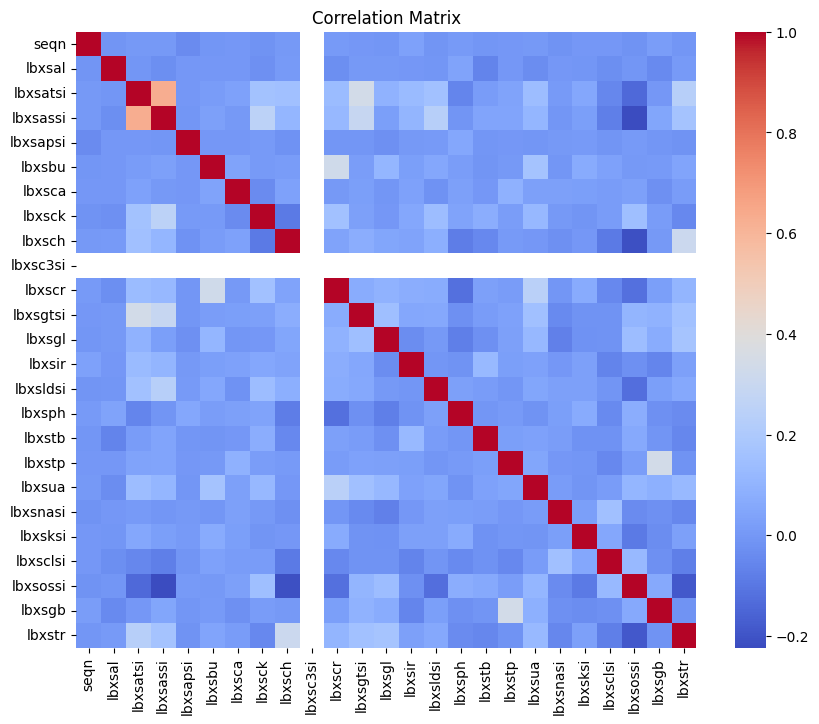

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('transactions.csv')

# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [6]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import time
from memory_profiler import memory_usage
def extract_and_save_rules(transactions_file, output_file):
   # Start memory usage measurement
    mem_usage_before = memory_usage(max_usage=True)
    start_time = time.time()  
    # Load transactions from the transactions CSV file
    transactions = pd.read_csv(transactions_file)

    # Drop non-transaction columns like 'Transaction_ID' and 'seqn'
    transactions = transactions.drop(columns=[ 'seqn'])

    # Convert data to binary format (1s and 0s)
    transactions_binary = transactions.astype(bool)

    # Apply Apriori algorithm to find frequent itemsets
    frequent_itemsets = apriori(transactions_binary, min_support=0.05, use_colnames=True)

    # Generate association rules from frequent itemsets
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

    # Save extracted association rules to a CSV file
    rules.to_csv(output_file, index=False)
    end_time = time.time()  # End time for performance measurement
    mem_usage_after = memory_usage(max_usage=True)
    execution_time = end_time - start_time
    
    # End time measurement
    end_time = time.time()

    # End memory usage measurement
    mem_usage_after = memory_usage(max_usage=True)

    # Calculate execution time
    execution_time = end_time - start_time
    number_of_rules=len(rules)
    # Calculate performance
    performance_value = calculate_performance(transactions_file, 0.2, 0.7,number_of_rules)
    print(f"Performance Value: {performance_value}")
    # Print memory usage and performance metrics
    print(f"Memory Usage Before: {mem_usage_before} MB")
    print(f"Memory Usage After: {mem_usage_after} MB")
    print(f"Peak Memory Usage: {mem_usage_after - mem_usage_before} MB")
    print(f"Execution Time: {execution_time} seconds")
# Define function to calculate performance
def calculate_performance(transactions_file, min_support, min_confidence,num_rules):
    # Variables to store total number of rules and number of runs
    total_num_rules = 0
    num_runs = 0

    # Perform multiple runs with different parameter settings
    for i in range(3):  # Adjust the number of runs as needed
        total_num_rules += num_rules
        num_runs += 1

    # Calculate the average number of rules generated
    average_num_rules = total_num_rules / num_runs

    return average_num_rules

# Define file paths
transactions_file_low = 'transactions_low.csv'
output_file_low = 'rules_low.csv'

# Extract association rules from transactions_low and save to rules_low.csv
extract_and_save_rules(transactions_file_low, output_file_low)

# Define file paths
transactions_file_high = 'transactions_high.csv'
output_file_high = 'rules_high.csv'

# Extract association rules from transactions_low and save to rules_low.csv
extract_and_save_rules(transactions_file_high, output_file_high)

# Define file paths
transactions_file_mixte = 'transactions_mixte.csv'
output_file_mixte = 'rules_mixte.csv'

# Extract association rules from transactions_low and save to rules_low.csv
extract_and_save_rules(transactions_file_mixte, output_file_mixte)


Performance Value: 150.0
Memory Usage Before: 167.0234375 MB
Memory Usage After: 170.2578125 MB
Peak Memory Usage: 3.234375 MB
Execution Time: 0.3383488655090332 seconds
Performance Value: 20.0
Memory Usage Before: 169.05859375 MB
Memory Usage After: 170.234375 MB
Peak Memory Usage: 1.17578125 MB
Execution Time: 0.19029569625854492 seconds
Performance Value: 1544.0
Memory Usage Before: 169.03515625 MB
Memory Usage After: 168.96875 MB
Peak Memory Usage: -0.06640625 MB
Execution Time: 0.8829994201660156 seconds


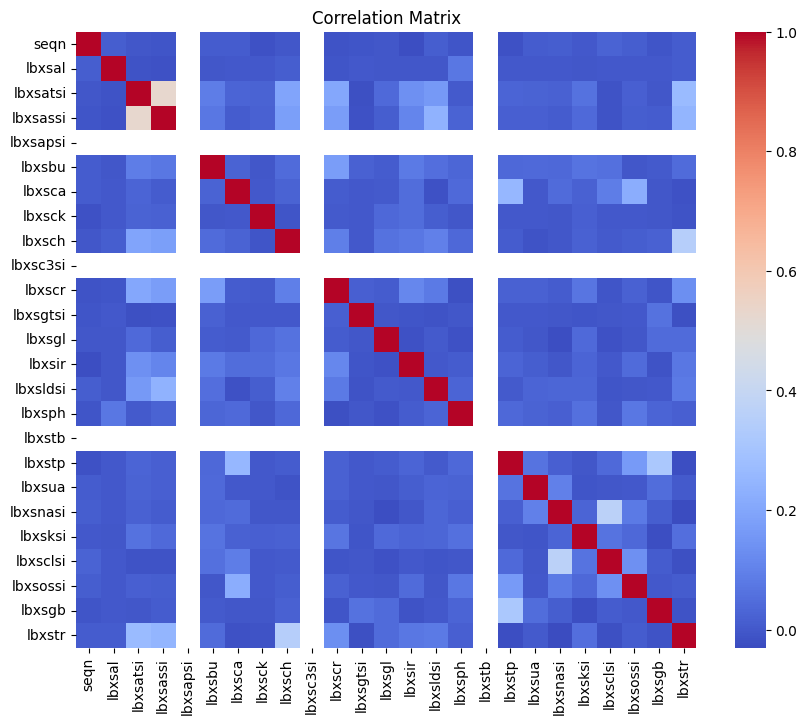

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('transactions_low.csv')

# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
# Save the plot as a PNG file
plt.savefig('correlation_matrix.png')
plt.show()


In [7]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
import time
from memory_profiler import memory_usage

def extract_and_save_rules(transactions_file, output_file):
    # Start memory usage measurement
    mem_usage_before = memory_usage(max_usage=True)
    start_time = time.time()  
    # Load transactions from the transactions CSV file
    transactions = pd.read_csv(transactions_file)

    # Drop non-transaction columns like 'Transaction_ID' and 'seqn'
    transactions = transactions.drop(columns=['seqn'])

    # Convert data to binary format (1s and 0s)
    transactions_binary = transactions.astype(bool)

    # Apply FP-Growth algorithm to find frequent itemsets
    frequent_itemsets = fpgrowth(transactions_binary, min_support=0.2, use_colnames=True)

    # Generate association rules from frequent itemsets
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

    # Save extracted association rules to a CSV file
    rules.to_csv(output_file, index=False)
    
    # End time measurement
    end_time = time.time()

    # End memory usage measurement
    mem_usage_after = memory_usage(max_usage=True)

    # Calculate execution time
    execution_time = end_time - start_time
    
    # Calculate performance
    num_rules = len(rules)
    performance_value = calculate_performance(num_rules)
    
    # Print memory usage and performance metrics
    print(f"Performance Value: {performance_value}")
    print(f"Memory Usage Before: {mem_usage_before} MB")
    print(f"Memory Usage After: {mem_usage_after} MB")
    print(f"Peak Memory Usage: {mem_usage_after - mem_usage_before} MB")
    print(f"Execution Time: {execution_time} seconds")

# Define function to calculate performance
def calculate_performance(num_rules):
    # Since we're not doing multiple runs, the performance value is simply the number of generated rules
    return num_rules

# Define file paths
transactions_file_low = 'transactions_low.csv'
output_file_low = 'rules_low.csv'

# Extract association rules from transactions_low and save to rules_low.csv
extract_and_save_rules(transactions_file_low, output_file_low)

# Define file paths
# Define file paths
transactions_file_high = 'transactions_high.csv'
output_file_high = 'rules_high.csv'

# Extract association rules from transactions_low and save to rules_low.csv
extract_and_save_rules(transactions_file_high, output_file_high)


Performance Value: 13
Memory Usage Before: 167.78125 MB
Memory Usage After: 168.9921875 MB
Peak Memory Usage: 1.2109375 MB
Execution Time: 0.6509890556335449 seconds
Performance Value: 1
Memory Usage Before: 167.79296875 MB
Memory Usage After: 168.9921875 MB
Peak Memory Usage: 1.19921875 MB
Execution Time: 0.3212006092071533 seconds


In [11]:
# Filter rules where 'X' is in antecedents and print consequents
def filter_and_print_rules(rules, x):
    filtered_rules = rules[rules['antecedents'].apply(lambda antecedent: x in antecedent)]
    if not filtered_rules.empty:
        # Sort filtered rules by support and confidence
        filtered_rules = filtered_rules.sort_values(by=['support', 'confidence'], ascending=False)
        for index, row in filtered_rules.iterrows():
            print(f"Antecedent: {row['antecedents']}, Consequent: {row['consequents']}")

rules = pd.read_csv('rules_high.csv')
# Call the function with your desired value of 'X'
filter_and_print_rules(rules, 'lbxsgb')



In [12]:
import pandas as pd

def filter_and_print_rules(rules, items, depth=None):
    if depth is None:
        depth = len(items)

    if depth == 0:
        return pd.DataFrame()

    filtered_rules = rules[rules['antecedents'].apply(lambda antecedent: set(items[:depth]).issubset(set(antecedent)))]
    
    print("Items:", items[:depth])  # Debugging print statement
    print("Filtered Rules:")
    print(filtered_rules)  # Debugging print statement
    
    if not filtered_rules.empty:
        return filtered_rules
    else:
        return filter_rules_recursively_reverse(rules, items, depth - 1)

def filter_and_save_rules(rules, items, output_file):
    filtered_rules = filter_rules_recursively_reverse(rules.copy(), items)

    if not filtered_rules.empty:
        filtered_rules.to_csv(output_file, index=False)
        print(f"Filtered rules saved to {output_file}")
    else:
        print("No rules found with any of the given items in antecedents.")

# Example usage
rules = pd.read_csv('rules_high.csv')
items = ['lbdscasi', 'lbxsgb']

filter_and_save_rules(rules, items, 'racha.csv')


NameError: name 'filter_rules_recursively_reverse' is not defined

In [13]:
import pandas as pd

# Load the filtered rules from CSV
filtered_rules = pd.read_csv('racha.csv')

def select_most_important_rules(rules, metric):
    """
    Selects the most important rules based on a given metric.

    Args:
        rules (pd.DataFrame): DataFrame containing filtered rules.
        metric (str): Metric to use for selecting important rules (e.g., 'confidence', 'support', etc.).

    Returns:
        pd.DataFrame: DataFrame containing the most important rules.
    """
    # Sort the rules based on the specified metric in descending order
    sorted_rules = rules.sort_values(by=metric, ascending=False)
    
    # Select the top most important rules (e.g., top 10 rules)
    most_important_rules = sorted_rules.head(10)
    
    return most_important_rules

# Example usage
most_important_rules = select_most_important_rules(filtered_rules, 'confidence')
print(most_important_rules)


EmptyDataError: No columns to parse from file

In [3]:
def extract_additional_tests(rules):
    """
    Extracts additional tests from the consequents of selected rules.

    Args:
        rules (pd.DataFrame): DataFrame containing selected rules.

    Returns:
        list: List of additional tests extracted from the consequents.
    """
    additional_tests = []
    
    for index, rule in rules.iterrows():
        consequents = rule['consequents'].split(',')
        additional_tests.extend(consequents)
    
    # Remove duplicates
    additional_tests = list(set(additional_tests))
    
    return additional_tests

# Example usage
additional_tests = extract_additional_tests(most_important_rules)
print("Additional tests:", additional_tests)


Additional tests: ["frozenset({'lbxsnasi'})"]


In [15]:
import pandas as pd

def forward_chaining_additional_tests(rules, patient_tests):
    additional_tests = set()
    new_additional_tests = set(patient_tests)

    while new_additional_tests:
        for test in new_additional_tests:
            for index, row in rules.iterrows():
                if all(fact in patient_tests for fact in row['antecedents']):
                    additional_tests.update(row['consequents'])
                    # Print rules that triggered this addition
                    print(f"Rule triggered (index {index}): {row['antecedents']} -> {row['consequents']}")

        new_additional_tests = additional_tests.difference(patient_tests)
        patient_tests.update(additional_tests)

    return additional_tests




# Load the rules from a CSV file
rules = pd.read_csv('rules_high.csv')

# Patient's initial tests
patient_initial_tests = {'lbxstp', 'lbdschsi', 'lbxsclsi'}

# Perform forward chaining to find additional tests
additional_tests = forward_chaining_additional_tests(rules, patient_initial_tests)

import csv

# ... (rest of your code for forward_chaining_additional_tests)

# Open the output CSV file in append mode ('a')
with open('additional_tests.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write header row only if the file is empty (first run)
    csvfile.seek(0, 2)  # Move the file pointer to the end
    if csvfile.tell() == 0:
        writer.writerow(['Additional Tests'])

    # Write each additional test to a new row
    for test in additional_tests:
        writer.writerow([test])

print("Additional tests written to additional_tests.csv")



Additional tests written to additional_tests.csv


In [16]:
import pandas as pd

def preprocess_rules(rules_file):
    # Load association rules from the rules CSV file
    rules = pd.read_csv(rules_file)

    # Convert frozenset objects to strings
    rules['antecedents'] = rules['antecedents'].apply(lambda x: x.strip("{}").replace("'", ""))
    rules['consequents'] = rules['consequents'].apply(lambda x: x.strip("{}").replace("'", ""))

    return rules

def extract_rules_for_analysis(rules, analysis):
    # Filter rules where the antecedents include the analysis
    relevant_rules = rules[rules['antecedents'].str.contains(analysis)]
    return relevant_rules[['antecedents', 'consequents', 'support', 'confidence']]

def extract_rules_for_analyses(rules, analyses):
    result_df = pd.DataFrame()
    for analysis in analyses:
        rules_df = extract_rules_for_analysis(rules, analysis)
        result_df = pd.concat([result_df, rules_df])
    return result_df

# Example usage
rules_file = 'rules_high.csv'

# Preprocess rules data
rules = preprocess_rules(rules_file)

# List of analyses
analyses = ['lbdscasi', 'lbxsgb', 'lbxsph']  # Example list of analyses

# Extract rules for each analysis
result_df = extract_rules_for_analyses(rules, analyses)

# Sort the result DataFrame by support and confidence
result_df = result_df.sort_values(by=['support', 'confidence'], ascending=False)

# Print the sorted result DataFrame
print("Result DataFrame (Sorted by Support and Confidence):")
print(result_df)

# Save the sorted result to a CSV file
result_df.to_csv('rules_result_sorted.csv', index=False)


Result DataFrame (Sorted by Support and Confidence):
            antecedents            consequents   support  confidence
9   frozenset({lbxsph})  frozenset({lbxsossi})  0.110704         1.0
12  frozenset({lbxsgb})  frozenset({lbxsossi})  0.065048         1.0


In [16]:
def detect_disease(test_results, thresholds_high, thresholds_low, disease_list):
    diseases = []
    
    for test, value in test_results.items():
        if test.lower() in thresholds_high and value > thresholds_high[test.lower()]:
            # إذا تجاوزت القيمة العتيقة الحد العلوي المحدد، سيتم اعتبارها مؤشرًا على المرض
            diseases.extend(get_diseases(test, disease_list))
        elif test.lower() in thresholds_low and value < thresholds_low[test.lower()]:
            # إذا كانت القيمة العتيقة أقل من الحد السفلي المحدد، سيتم اعتبارها مؤشرًا على المرض
            diseases.extend(get_diseases(test, disease_list))
    
    return diseases


# الحصول على الأمراض المحتملة
def get_diseases(test, disease_list):
    diseases = {
        "lbxsal": ["Chronic Kidney Disease"],
        "lbxsatsi": ["Hepatitis", "Liver Disease"],
        "lbxsassi": ["Hepatitis", "Liver Disease"],
        "lbxsapsi": ["Hepatitis", "Liver Disease"],
        "lbxsbu": ["Chronic Kidney Disease"],
        "lbdsbusi": ["Chronic Kidney Disease"],
        "lbxsca": ["Osteoporosis"],
        "lbxsck": ["Muscle Disorders"],
        "lbxsch": ["Heart Disease"],
        "lbxsc3si": ["Kidney Disorders"],
        "lbxscr": ["Chronic Kidney Disease"],
        "lbxsgtsi": ["Hepatitis", "Liver Disease"],
        "lbxsgl": ["Diabetes"],
        "lbxsir": ["Iron Deficiency Anemia"],
        "lbxsldsi": ["Hepatitis", "Liver Disease"],
        "lbxsph": ["Kidney Disorders"],
        "lbxstb": ["Hepatitis", "Liver Disease"],
        "lbxstp": ["Protein Deficiency"],
        "lbxsua": ["Gout"],
        "lbdsuasi": ["Gout"],
        "lbxsnasi": ["Fluid Disorders"],
        "lbxsksi": ["Fluid Disorders"],
        "lbxsclsi": ["Fluid Disorders"],
        "lbxsossi": ["Fluid Disorders"],
        "lbxsgb": ["Infections"],
        "lbxstr": ["Blood Lipid Disorders"]
    }
    
    return [disease for disease in diseases.get(test.lower(), []) if disease in disease_list]

# الحدود العلوية للتحاليل
thresholds_high = {
    "lbxsal": 5.5,
    "lbxsatsi": 33,
    "lbxsassi": 33,
    "lbxsapsi": 130,
    "lbxsbu": 20,
    "lbdsbusi": 5,
    "lbxsca": 10.2,
    "lbxsck": 200,
    "lbxsch": 240,
    "lbxsc3si": 50,
    "lbxscr": 1.3,
    "lbxsgtsi": 40,
    "lbxsgl": 100,
    "lbxsir": 150,
    "lbxsldsi": 233,
    "lbxsph": 4.5,
    "lbxstb": 1.2,
    "lbxstp": 8.3,
    "lbxsua": 7,
    "lbdsuasi": 291.5,
    "lbxsnasi": 145,
    "lbxsksi": 5.2,
    "lbxsclsi": 106,
    "lbxsossi": 235,
    "lbxsgb": 3.5,
    "lbxstr": 199
}

# الحدود السفلية للتحاليل
thresholds_low = {
    "lbxsal": 2.2,
    "lbxsatsi": 19,
    "lbxsassi": 25,
    "lbxsapsi": 20,
    "lbxsbu": 7,
    "lbxsca": 8.5,
    "lbxsck": 20,
    "lbxsch": 190,
    "lbxsc3si": 5,
    "lbxscr": 0.7,
    "lbxsgtsi": 5,
    "lbxsgl": 72,
    "lbxsir": 40,
    "lbxsldsi": 105,
    "lbxsph": 2.8,
    "lbxstb": 0.1,
    "lbxstp": 6,
    "lbxsua": 2,
    "lbxsnasi": 135,
    "lbxsksi": 3.6,
    "lbxsclsi": 96,
    "lbxsossi": 275,
    "lbxsgb": 2,
    "lbxstr": 150
}

# قائمة الأمراض
disease_list = [
    "Hypertension", "Hepatitis B", "Influenza", "Osteoporosis", "Chronic Bronchitis",
    "Malaria", "Rheumatoid Arthritis", "Pneumonia", "Cancer (Breast)", "Depression",
    "HIV/AIDS", "Osteoarthritis", "Anemia (Iron Deficiency)", "Alzheimer's Disease",
    "Epilepsy", "Chronic Kidney Disease", "Gastrointestinal Reflux Disease (GERD)",
    "Coronary Artery Disease (CAD)", "Hypothyroidism", "Irritable Bowel Syndrome (IBS)",
    "Psoriasis", "Migraine", "Asthma", "Acne", "Stroke", "Chronic Obstructive Pulmonary Disease (COPD)",
    "Cirrhosis", "Endometriosis", "Chronic Fatigue Syndrome", "Gout", "Polycystic Ovary Syndrome (PCOS)",
    "Glomerulonephritis", "Crohn's Disease", "Lupus", "Hepatitis", "Diabetes"
]
# قائمة بنتائج التحاليل
test_results = {
    "lbxsal": 6.0,
    "lbxsatsi": 40,
    "lbxsassi": 35,
    "lbxsclsi": 96,
    "lbxsossi": 275,
    "lbxsgb": 1,
    "lbxstr": 130
}

# الحصول على الأمراض المحتملة
possible_diseases = detect_disease(test_results, thresholds_high, thresholds_low, disease_list)

if possible_diseases:
    print("الأمراض المحتملة:")
    for disease in possible_diseases:
        print("- ", disease)
else:
    print("لا توجد أمراض محتملة.")


الأمراض المحتملة:
-  Chronic Kidney Disease
-  Hepatitis
-  Hepatitis
